<h1> Machine Learning Seminar </h1>

- 2021.08.18 Wed
- Machine Learning Seminar
- CH08 Deep Learning and Artificial Neural Network


In [ ]:
# 딥러닝 라이브러리 텐서플로의 케라스 패키지 사용

from tensorflow import keras

# 패션 MNIST 데이터 다운로드
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


- load_data() : 훈련/테스트 데이터 나누어 반환 (입력과 타깃의 쌍으로 구성)

In [ ]:
# 전달받은 데이터 크기 확인
print(train_input.shape, train_target.shape) # 훈련 데이터셋
print(test_input.shape, test_target.shape) # 테스트 데이터셋


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 훈련 데이터셋: 60,000개의 이미지 (각 이미지의 크기 : 28 x 28)
- 테스트 데이터셋: 10,000개

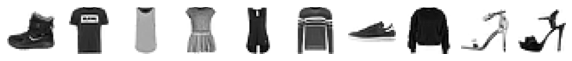

In [ ]:
# matplotlib 로 훈련 데이터의 샘플 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10): # 10개의 샘플값 출력
  axs[i].imshow(train_input[i], cmap='gray_r') # 흑백 이미지로 출력
  axs[i].axis('off')
plt.show()


<br><br>

<h1> 로지스틱 회귀로 패션 아이템 분류 </h1>

In [ ]:
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()


# 각 샘플을 1차월 배열로 재구성
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

print(train_scaled.shape, test_scaled.shape)


(60000, 784) (10000, 784)


<br>

<h2> SGDClassifier 클래스와 cross_validate 함수 이용하여 데이터에서 교차 검증으로 성능 확인</h2>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier

kfold = StratifiedKFold()
sc = SGDClassifier(loss='log', max_iter=5, random_state=42, n_jobs=-1)
scores = []

for k, (train, test) in enumerate(kfold.split(train_scaled,train_target)):
  sc.fit(train_scaled[train], train_target[train])
  scores.append(sc.score(train_scaled[test], train_target[test]))
print(np.mean(scores))
print(sc.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

NameError: ignored

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9999999999999)

train_input_2d = train_input.reshape(-1,28*28)
test_input_2d = test_input.reshape(-1, 28*28)

pca.fit(train_input_2d)

train_input_pca = pca.transform(train_input_2d)
test_input_pca = pca.transform(test_input_2d)

print(train_input_pca.shape)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

train_scaled_pca = train_input_pca / 255.0
test_scaled_pca = test_input_pca / 255.0

(60000, 784)
784


NameError: ignored

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores=cross_validate(sc, train_scaled ,train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state = 42)

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

# time
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)


Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6093 - accuracy: 0.7933
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4793 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4564 - accuracy: 0.8481
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4442 - accuracy: 0.8519
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4512 - accuracy: 0.8497


[0.45118677616119385, 0.8496666550636292]

<br>

<h1> Deep Learning </h1>

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


# 2개의 dense layer 사용
# param: 뉴런 개수, 뉴런의 출력에 적용할 activation 함수, 입력의 크기

dense1 = keras.layers.Dense(100, activation='sigmoid',input_shape=(28*28,)) 
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2]) # Sequentioal 클래스 사용
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<h1> 심층 신경망 </h1>

<h2> layer , model 이름 설정 </h2>


In [ ]:
model = keras.Sequential([
  keras.layers.Dense(100, activation='sigmoid', input_shape=(28*28,), name='hidden'),
  keras.layers.Dense(10, activation='softmax', name='output')
  ], name='Fashin MNIST Model')

# model.summary()

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid',input_shape=(28*28,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

model.summary()


Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5587 - accuracy: 0.8074
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4102 - accuracy: 0.8524
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8722
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3343 - accuracy: 0.8788


<h2> Flatten 이미지 </h2>


In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state = 42)
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5273 - accuracy: 0.8139
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3929 - accuracy: 0.8598
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3562 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
sgd = keras.optimizers.SGD() # SGD 클래스의 object
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7902 - accuracy: 0.7458
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5331 - accuracy: 0.8204
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4854 - accuracy: 0.8324
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4584 - accuracy: 0.8424
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4438 - accuracy: 0.8443


[0.44381749629974365, 0.8442500233650208]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
sgd = keras.optimizers.SGD(learning_rate=0.1) # hyperparameter turgning in optimizer
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5638 - accuracy: 0.7981
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4140 - accuracy: 0.8505
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8632
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3512 - accuracy: 0.8706
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3529 - accuracy: 0.8732


[0.35285067558288574, 0.8731666803359985]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad,loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1943 - accuracy: 0.6341
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8018 - accuracy: 0.7427
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7122 - accuracy: 0.7701
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6637 - accuracy: 0.7859
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.6328 - accuracy: 0.7956


[0.632802426815033, 0.7955833077430725]

In [ ]:
# default optimizer : RMSprop

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)


Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5332 - accuracy: 0.8114
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3938 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3567 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8800
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3646 - accuracy: 0.8773


[0.3645689785480499, 0.8772500157356262]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)


<br>

<h1> Deep Learning Technique </h1>

<h2> 신경망 모델 훈련 </h2>

- 손실 곡선
<br>


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

# 손실도, 정확도 포함
print(history.history.keys())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


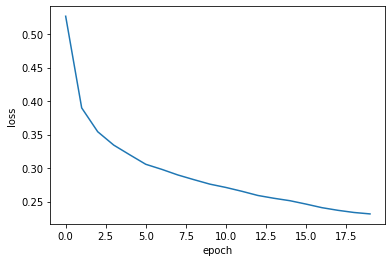

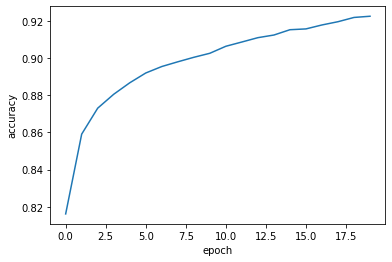

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


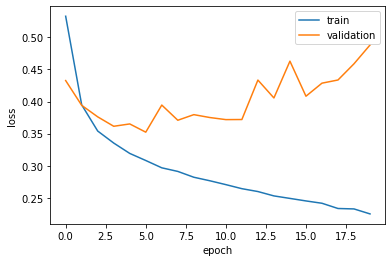

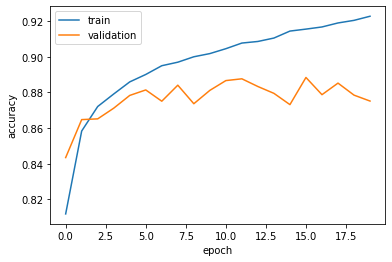

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()


<br>

<h2> Dropout </h2>
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 골라 (뉴런의 출력을 0으로 만듬) 과대적합을 막는다,

<h3> Apply dropout layer </h3>


Epoch 1/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.5290 - accuracy: 0.8153 - val_loss: 0.4512 - val_accuracy: 0.8436
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8568 - val_loss: 0.3716 - val_accuracy: 0.8670
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3591 - accuracy: 0.8697 - val_loss: 0.3607 - val_accuracy: 0.8703
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3294 - accuracy: 0.8800 - val_loss: 0.3421 - val_accuracy: 0.8782
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8850 - val_loss: 0.3558 - val_accuracy: 0.8731
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8916 - val_loss: 0.3342 - val_accuracy: 0.8818
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.8965 - val_loss: 0.3268 - val_accurac

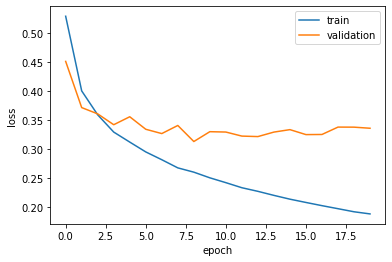

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5873 - accuracy: 0.7929 - val_loss: 0.4269 - val_accuracy: 0.8492
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4388 - accuracy: 0.8423 - val_loss: 0.3966 - val_accuracy: 0.8542
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4014 - accuracy: 0.8535 - val_loss: 0.3624 - val_accuracy: 0.8667
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3811 - accuracy: 0.8618 - val_loss: 0.3683 - val_accuracy: 0.8652
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3637 - accuracy: 0.8678 - val_loss: 0.3549 - val_accuracy: 0.8677
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3534 - accuracy: 0.8711 - val_loss: 0.3393 - val_accuracy: 0.8778
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3433 - accuracy: 0.8737 - val_loss: 0.3453 - val_accuracy:

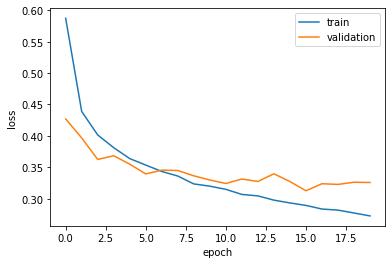

In [ ]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()


<br>

<h3> 모델 저장과 복원 </h3>

- 모델 구조와 모델 파라미터를 함께 저장 : save()

In [ ]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')
!ls -al *.h5

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')



-rw-r--r-- 1 root root 332480 Aug 18 06:05 model-weights.h5
-rw-r--r-- 1 root root 333848 Aug 18 06:05 model-whole.h5


In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

print(model.predict(val_scaled[0:1]))


0.8866666666666667
[[8.1465676e-12 2.2264295e-16 2.8177809e-15 7.5022962e-15 2.3703886e-12
  1.0735366e-09 5.3665578e-16 3.5852288e-09 1.0000000e+00 7.6834909e-15]]


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(val_scaled,val_target)

model = keras.models.load_model('model-whole.h5')
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(val_scaled, val_target)




375/375 [==============================] - 1s 1ms/step - loss: 0.3257 - accuracy: 0.8867


[0.32567259669303894, 0.8866666555404663]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)


Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5949 - accuracy: 0.7904 - val_loss: 0.4208 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4386 - accuracy: 0.8415 - val_loss: 0.3997 - val_accuracy: 0.8523
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4039 - accuracy: 0.8525 - val_loss: 0.3812 - val_accuracy: 0.8596
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8607 - val_loss: 0.3445 - val_accuracy: 0.8725
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3647 - accuracy: 0.8667 - val_loss: 0.3418 - val_accuracy: 0.8741
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3523 - accuracy: 0.8701 - val_loss: 0.3372 - val_accuracy: 0.8785
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3420 - accuracy: 0.8744 - val_loss: 0.3371 - val_accuracy:

[0.32054954767227173, 0.887499988079071]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[early_stopping_cb])
model.evaluate(val_scaled, val_target)


Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5911 - accuracy: 0.7912 - val_loss: 0.4444 - val_accuracy: 0.8351
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4395 - accuracy: 0.8421 - val_loss: 0.4140 - val_accuracy: 0.8472
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4012 - accuracy: 0.8533 - val_loss: 0.3610 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3801 - accuracy: 0.8614 - val_loss: 0.3554 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3674 - accuracy: 0.8658 - val_loss: 0.3498 - val_accuracy: 0.8724
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3543 - accuracy: 0.8698 - val_loss: 0.3410 - val_accuracy: 0.8753
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3439 - accuracy: 0.8733 - val_loss: 0.3475 - val_accuracy:

[0.3252984881401062, 0.8814166784286499]